## Imports

In [1]:
import sys
sys.path.append('../001_modules')

from trainning_tools import *
%matplotlib inline

## Trainning 1

In [2]:
trn_dl, val_dl = get_data()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 10

model, loss_fn, optimizer = get_model()

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                factor=0.5,patience=5,
                                                threshold = 0.001,
                                                verbose=True,
                                                min_lr = 1e-5,
                                                threshold_mode = 'abs')

using: cuda


In [3]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:23<00:00, 26.31s/it]

CPU times: total: 4min 32s
Wall time: 4min 23s


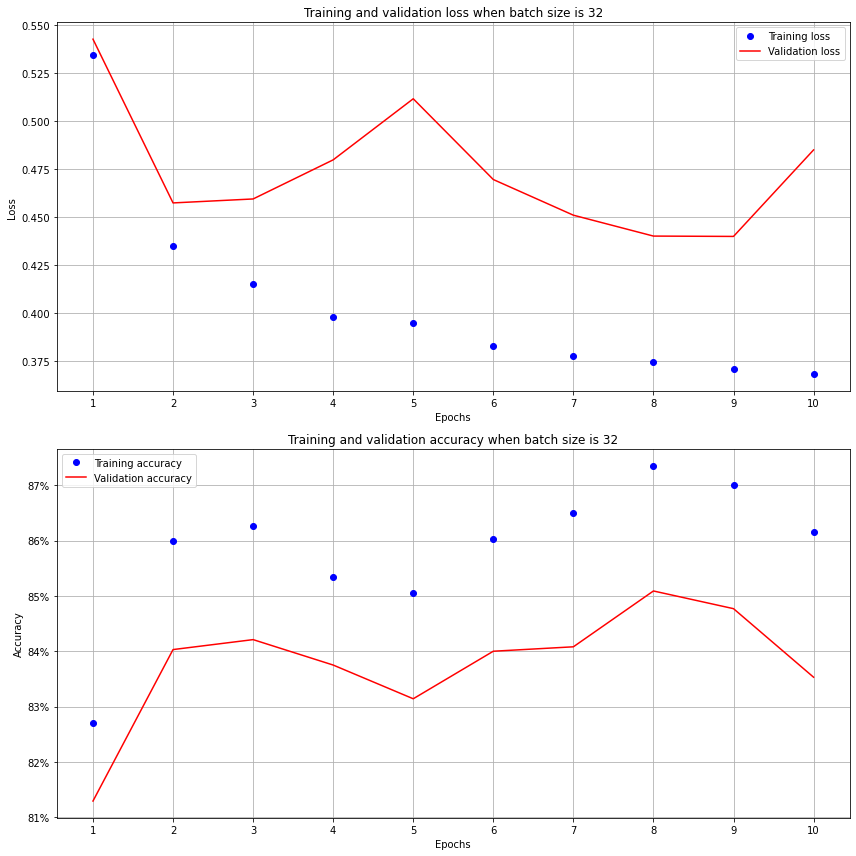

In [4]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

## Trainning 2

In [5]:
trn_dl, val_dl = get_data(512)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 10

model, loss_fn, optimizer = get_model()

using: cuda


In [6]:
%%time
for epoch in tqdm(range(epochs)):
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:25<00:00, 20.54s/it]

CPU times: total: 3min 38s
Wall time: 3min 25s


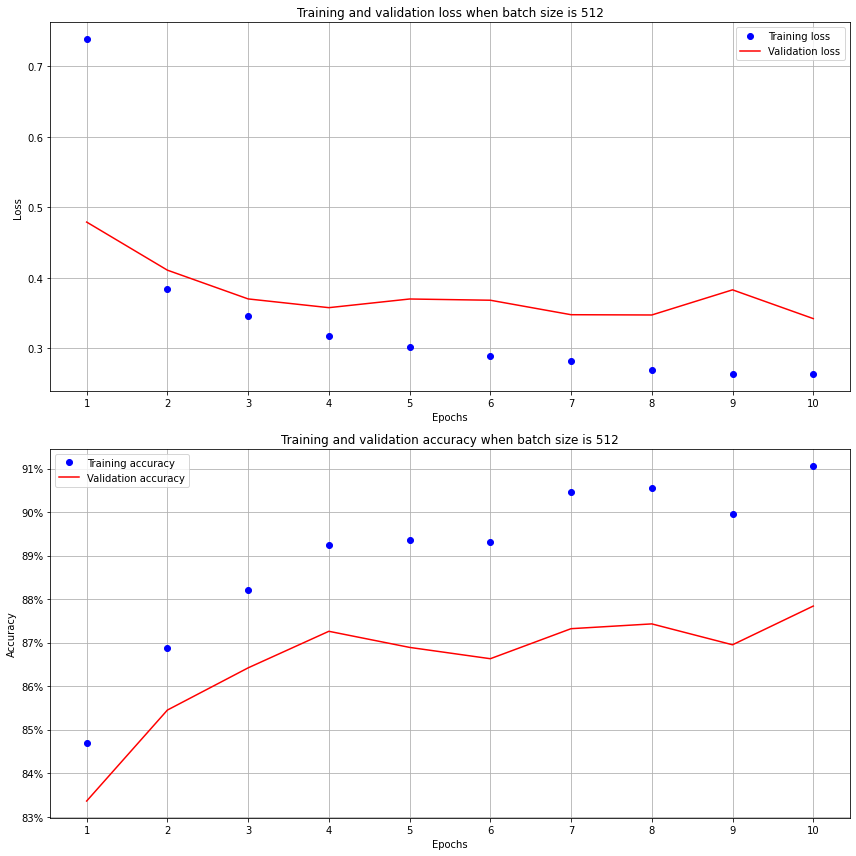

In [7]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

## Trainning 3

In [8]:
trn_dl, val_dl = get_data(512)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 50

model, loss_fn, optimizer = get_model()

using: cuda


In [9]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

 12%|██████████████▋                                                                                                           | 6/50 [02:00<14:49, 20.22s/it]

Epoch 00026: reducing learning rate of group 0 to 5.0000e-03.


 24%|█████████████████████████████                                                                                            | 12/50 [04:05<13:16, 20.96s/it]

Epoch 00032: reducing learning rate of group 0 to 2.5000e-03.


 36%|███████████████████████████████████████████▌                                                                             | 18/50 [06:08<10:51, 20.35s/it]

Epoch 00038: reducing learning rate of group 0 to 1.2500e-03.


 48%|██████████████████████████████████████████████████████████                                                               | 24/50 [08:09<08:47, 20.28s/it]

Epoch 00044: reducing learning rate of group 0 to 6.2500e-04.


 60%|████████████████████████████████████████████████████████████████████████▌                                                | 30/50 [10:08<06:38, 19.91s/it]

Epoch 00050: reducing learning rate of group 0 to 3.1250e-04.


 72%|███████████████████████████████████████████████████████████████████████████████████████                                  | 36/50 [12:07<04:38, 19.88s/it]

Epoch 00056: reducing learning rate of group 0 to 1.5625e-04.


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 42/50 [14:06<02:38, 19.87s/it]

Epoch 00062: reducing learning rate of group 0 to 7.8125e-05.


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 48/50 [16:05<00:39, 19.80s/it]

Epoch 00068: reducing learning rate of group 0 to 3.9063e-05.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [16:45<00:00, 20.11s/it]

CPU times: total: 17min 50s
Wall time: 16min 45s


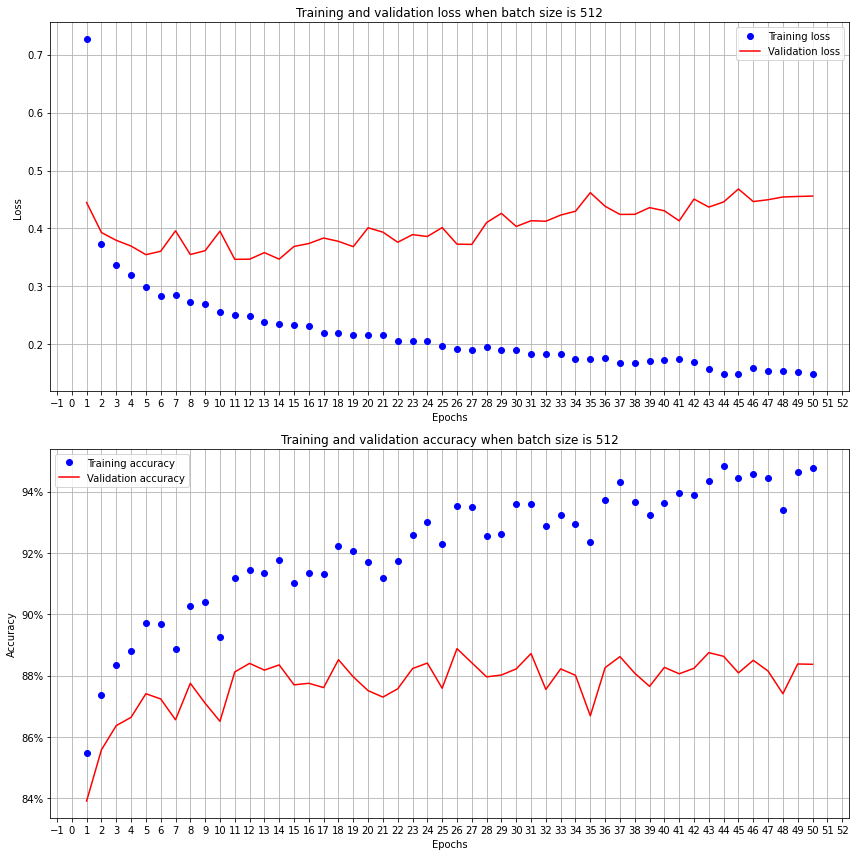

In [10]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

## Trainning 4

In [11]:
trn_dl, val_dl = get_data(512)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 50

model, loss_fn, optimizer = get_model('sgd')

using: cuda


In [12]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

  8%|█████████▊                                                                                                                | 4/50 [01:18<15:02, 19.63s/it]

Epoch 00074: reducing learning rate of group 0 to 1.9531e-05.


 20%|████████████████████████▏                                                                                                | 10/50 [03:14<12:53, 19.34s/it]

Epoch 00080: reducing learning rate of group 0 to 1.0000e-05.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [16:04<00:00, 19.28s/it]

CPU times: total: 17min 12s
Wall time: 16min 4s


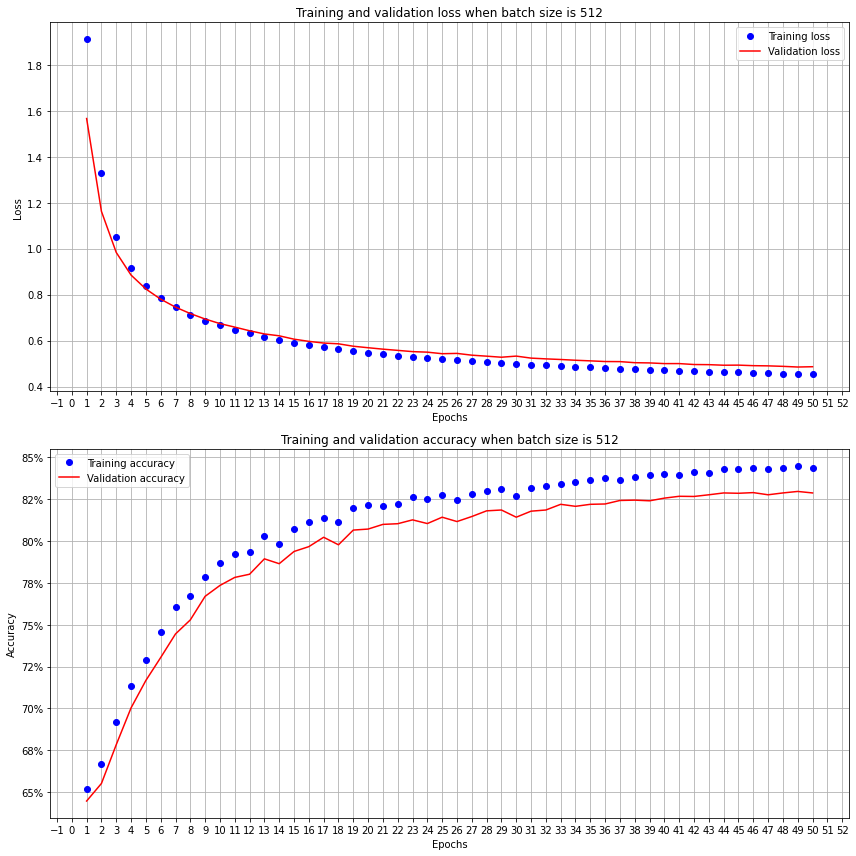

In [13]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()